# Get the data   
Note: automate as much as possible so you can easily get fresh data.

- [x] List the data you need and how much you need.  

> * FMI API weather forecast data from https://github.com/kipe/fmi
> * FMI historical data downloaded with a csv from https://en.ilmatieteenlaitos.fi/download-observations
> * Helen historical data downloaded with a csv from https://www.helen.fi/en/solar-panels/solar-power-plants/suvilahti-solar-power-plant
> * Calculation of theoretical solar irradiance: 
 - http://sgemfinalreport.fi/files/WP611_photovoltaics%20HP%20Hellman.pdf
 - https://hal.archives-ouvertes.fr/hal-00361373/document

- [x] Find and document where you can get that data.
- [x] Check how much space it will take.
> 4.8 MB
- [x] Check legal obligations, and get the authorization if necessary.
>* fmi_weather license: __MIT__
>* GHI article citations
>* helen data and weather observation data are freely available
- [x] Get access authorizations.
>Wasn't necessary
- [x] Create a workspace (with enough storage space).
- [x] Get the data.
>Downloading data 1/4/2015 - 30/4/2020 in hourly resolution
>Weather data from Helsinki, Kumpula - the closest observation station to Suvilahti
- [x] Convert the data to a format you can easily manipulate (without changing the data itself).
- [x] Ensure sensitive information is deleted or protected (e.g., anonymized).
- [x] Check the size and type of data (time series, sample, geographical, etc.).
>Timeseries converted into UTC

First, we need to read all the data together and save them for later use in a more comfortable format for feature engineering and model building.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pytz

def multiple_years_files_gather_data(year_range, string):
    df = pd.DataFrame()
    #adding to one dataframe
    for year in year_range:
        year_start = str(year)
        year_end = str(year+1)
        df_temp = pd.read_csv('../datasets/'+ string + year_start + '_'+ year_end + '.csv')
        df = pd.concat([df,df_temp],axis=0)
    return df

#### Weather observation data

In [5]:
year_range = np.arange(15,20)
df_weather = multiple_years_files_gather_data(year_range=year_range, string='initial_weather_obs_')

In [6]:
df_weather.tail()

,Year,m,d,Time,Time zone,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Precipitation intensity (mm/h),Snow depth (cm),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s)
8779,2020,4,30,20:00,UTC,0.0,1015.5,66.0,0.0,0.0,3.2,-2.5,50000.0,89.0,6.1,4.4
8780,2020,4,30,21:00,UTC,7.0,1015.6,67.0,0.0,0.0,3.2,-2.3,50000.0,87.0,5.6,3.4
8781,2020,4,30,22:00,UTC,7.0,1015.3,74.0,0.0,0.0,3.4,-0.9,50000.0,90.0,8.4,4.9
8782,2020,4,30,23:00,UTC,0.0,1015.3,73.0,0.0,0.0,3.2,-1.3,50000.0,94.0,7.5,3.8
8783,2020,5,1,00:00,UTC,0.0,1015.4,73.0,0.0,0.0,3.2,-1.3,50000.0,102.0,8.1,4.8


In [7]:
#creating a datetime index for concatenation
df_weather['datetime'] = df_weather['Year'].astype(str)+'-'+df_weather['m'].astype(str)+'-'+df_weather['d'].astype(str)+' '+ df_weather['Time'].astype(str)
df_weather['datetime_converted'] = pd.to_datetime(df_weather['datetime'], utc=True)
df_weather = df_weather.set_index(pd.DatetimeIndex(df_weather['datetime_converted'],dayfirst=True))

In [8]:
df_weather.head()

,Year,m,d,Time,Time zone,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Precipitation intensity (mm/h),Snow depth (cm),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s),datetime,datetime_converted
datetime_converted,,,,,,,,,,,,,,,,,,
2015-04-01 00:00:00+00:00,2015,4,1,00:00,UTC,7.0,990.6,100.0,0.0,0.0,0.5,0.5,9690.0,107.0,2.7,2.3,2015-4-1 00:00,2015-04-01 00:00:00+00:00
2015-04-01 01:00:00+00:00,2015,4,1,01:00,UTC,5.0,991.0,100.0,0.0,0.0,0.4,0.4,5690.0,109.0,3.7,2.7,2015-4-1 01:00,2015-04-01 01:00:00+00:00
2015-04-01 02:00:00+00:00,2015,4,1,02:00,UTC,8.0,990.9,100.0,0.0,0.0,0.9,0.9,7680.0,118.0,2.9,2.3,2015-4-1 02:00,2015-04-01 02:00:00+00:00
2015-04-01 03:00:00+00:00,2015,4,1,03:00,UTC,7.0,990.8,100.0,0.0,0.0,1.1,1.1,6110.0,33.0,3.3,2.7,2015-4-1 03:00,2015-04-01 03:00:00+00:00
2015-04-01 04:00:00+00:00,2015,4,1,04:00,UTC,7.0,991.0,100.0,0.0,0.0,0.7,0.7,2800.0,28.0,2.9,2.1,2015-4-1 04:00,2015-04-01 04:00:00+00:00


#### Global radiation data

In [9]:
df_rad = multiple_years_files_gather_data(year_range=year_range, string='initial_global_rad_')

In [10]:
df_rad.tail()

,Year,m,d,Time,Time zone,Global radiation (W/m2)
8780,2020,4,30,20:00,UTC,-2.3
8781,2020,4,30,21:00,UTC,-1.8
8782,2020,4,30,22:00,UTC,-2.0
8783,2020,4,30,23:00,UTC,-2.5
8784,2020,5,1,00:00,UTC,-2.1


In [11]:
#creating a datetime index for concatenation
df_rad['datetime'] = df_rad['Year'].astype(str)+'-'+df_rad['m'].astype(str)+'-'+df_rad['d'].astype(str)+' '+ df_rad['Time'].astype(str)
df_rad['datetime_converted'] = pd.to_datetime(df_rad['datetime'], utc=True)
df_rad = df_rad.set_index(pd.DatetimeIndex(df_rad['datetime_converted'],dayfirst=True))

In [12]:
df_rad.head()

,Year,m,d,Time,Time zone,Global radiation (W/m2),datetime,datetime_converted
datetime_converted,,,,,,,,
2015-04-01 00:00:00+00:00,2015,4,1,00:00,UTC,-0.3,2015-4-1 00:00,2015-04-01 00:00:00+00:00
2015-04-01 01:00:00+00:00,2015,4,1,01:00,UTC,-1.1,2015-4-1 01:00,2015-04-01 01:00:00+00:00
2015-04-01 02:00:00+00:00,2015,4,1,02:00,UTC,-0.4,2015-4-1 02:00,2015-04-01 02:00:00+00:00
2015-04-01 03:00:00+00:00,2015,4,1,03:00,UTC,-0.8,2015-4-1 03:00,2015-04-01 03:00:00+00:00
2015-04-01 04:00:00+00:00,2015,4,1,04:00,UTC,4.6,2015-4-1 04:00,2015-04-01 04:00:00+00:00


#### PV data

In [13]:
df_solar = pd.read_csv('../datasets/initial_energy_data.csv', delimiter=';')

In [14]:
df_solar.tail()

,Date,Value (kWh)
44581,2015-04-01T04:00:00,0
44582,2015-04-01T03:00:00,0
44583,2015-04-01T02:00:00,0
44584,2015-04-01T01:00:00,0
44585,2015-04-01T00:00:00,0


In [15]:
#creating a datetime index for concatenation
df_solar['datetime_converted'] = pd.to_datetime(df_solar['Date'], utc=False)
df_solar['datetime_converted']=df_solar['datetime_converted'].dt.tz_localize(pytz.timezone('Europe/Helsinki'),nonexistent='NaT',ambiguous='NaT').dt.tz_convert('UTC')
df_solar = df_solar.set_index(pd.DatetimeIndex(df_solar['datetime_converted'],dayfirst=True))

In [18]:
df_solar.head()

,Date,Value (kWh),datetime_converted
datetime_converted,,,
2020-05-01 14:00:00+00:00,2020-05-01T17:00:00,37,2020-05-01 14:00:00+00:00
2020-05-01 13:00:00+00:00,2020-05-01T16:00:00,112,2020-05-01 13:00:00+00:00
2020-05-01 12:00:00+00:00,2020-05-01T15:00:00,193,2020-05-01 12:00:00+00:00
2020-05-01 11:00:00+00:00,2020-05-01T14:00:00,162,2020-05-01 11:00:00+00:00
2020-05-01 10:00:00+00:00,2020-05-01T13:00:00,220,2020-05-01 10:00:00+00:00


In [19]:
# before concatenating, need to remove the duplicate rows in each dataframe
df_weather = df_weather[~df_weather.index.duplicated(keep='first')]
df_rad = df_rad[~df_rad.index.duplicated(keep='first')]
df_solar = df_solar[~df_solar.index.duplicated(keep='first')]

In [20]:
frames = [df_weather, df_solar, df_rad]
df = pd.concat([df_weather,df_solar, df_rad], axis=1)

Getting rid of excessive and duplicated columns

In [21]:
df.columns

Index(['Year', 'm', 'd', 'Time', 'Time zone', 'Cloud amount (1/8)',
       'Pressure (msl) (hPa)', 'Relative humidity (%)',
       'Precipitation intensity (mm/h)', 'Snow depth (cm)',
       'Air temperature (degC)', 'Dew-point temperature (degC)',
       'Horizontal visibility (m)', 'Wind direction (deg)', 'Gust speed (m/s)',
       'Wind speed (m/s)', 'datetime', 'datetime_converted', 'Date',
       'Value (kWh)', 'datetime_converted', 'Year', 'm', 'd', 'Time',
       'Time zone', 'Global radiation (W/m2)', 'datetime',
       'datetime_converted'],
      dtype='object')

In [22]:
cols = ['Cloud amount (1/8)',
       'Pressure (msl) (hPa)', 'Relative humidity (%)',
       'Precipitation intensity (mm/h)', 'Snow depth (cm)',
       'Air temperature (degC)', 'Dew-point temperature (degC)',
       'Horizontal visibility (m)', 'Wind direction (deg)', 'Gust speed (m/s)',
       'Wind speed (m/s)',
       'Value (kWh)', 'Global radiation (W/m2)']
# will go with these for now
df = df[cols]

## A quick glance at the data before saving

In [25]:
#space and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44587 entries, NaT to 2020-05-01 14:00:00+00:00
Data columns (total 13 columns):
Cloud amount (1/8)                44501 non-null float64
Pressure (msl) (hPa)              44522 non-null float64
Relative humidity (%)             44522 non-null float64
Precipitation intensity (mm/h)    44427 non-null float64
Snow depth (cm)                   43895 non-null float64
Air temperature (degC)            39323 non-null float64
Dew-point temperature (degC)      42895 non-null float64
Horizontal visibility (m)         43605 non-null float64
Wind direction (deg)              44313 non-null float64
Gust speed (m/s)                  44321 non-null float64
Wind speed (m/s)                  44313 non-null float64
Value (kWh)                       44577 non-null object
Global radiation (W/m2)           44553 non-null float64
dtypes: float64(12), object(1)
memory usage: 4.8+ MB


Our target variables is not even a numerical one, it is an object. We would need to convert that to numerical before proceeding.

In [27]:
df['Value (kWh)'] = pd.to_numeric(df['Value (kWh)'], errors='raise')

ValueError: Unable to parse string "-" at position 3960

In [41]:
#There is a string '-' at position 3960, thus, let's impute this as a NaN to proceed.
df['Value (kWh)'] = df['Value (kWh)'].replace('-',np.nan)

In [42]:
df['Value (kWh)'] = pd.to_numeric(df['Value (kWh)'], errors='raise')

Now it worked, let's describe the variables in terms of counts, means, stds, etc.

In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cloud amount (1/8),44501.0,4.501831,3.369090,0.0,0.0,7.0,7.0,9.0
Pressure (msl) (hPa),44522.0,1012.114781,11.720689,964.2,1004.9,1012.2,1019.6,1049.0
Relative humidity (%),44522.0,78.296146,17.514553,13.0,68.0,83.0,93.0,100.0
Precipitation intensity (mm/h),44427.0,0.081014,0.485590,0.0,0.0,0.0,0.0,22.1
Snow depth (cm),43895.0,2.632555,8.168282,-1.0,-1.0,0.0,0.0,61.0
Air temperature (degC),39323.0,7.665038,8.233480,-24.9,1.5,7.1,14.3,32.5
Dew-point temperature (degC),42895.0,3.057629,7.576989,-27.6,-1.6,2.5,9.1,21.6
Horizontal visibility (m),43605.0,33525.662195,16586.077981,130.0,18600.0,38850.0,50000.0,50000.0
Wind direction (deg),44313.0,194.354185,93.644189,0.0,122.0,208.0,265.0,360.0
Gust speed (m/s),44321.0,6.994799,3.338048,0.3,4.5,6.5,9.0,23.5


Some variables look like they would need attention, for example, it looks like we would descretize some variables, such as precipitation intensity or wind direction. Precipitation intensity looks like it has a ton of values equal to 0. Wind direction is perhaps better as a categorical variable than the variety of degrees.

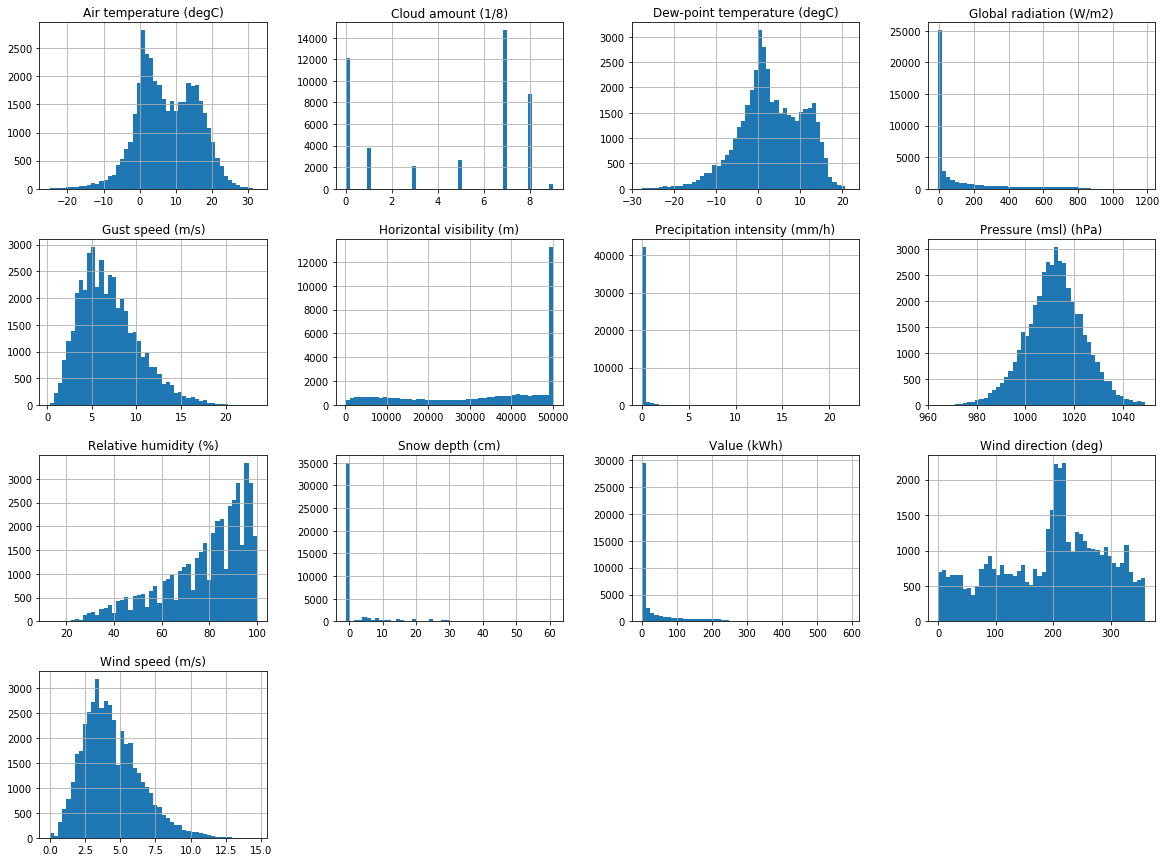

In [47]:
df.hist(bins=50, figsize=(20,15));

Yet again, this shows that some variables are better of discretized, for example clout amount, perhaps it would help to create less categories out of that. Perhaps Gust speed and Wind speed might be redundant.

In [44]:
#saving the whole data frame, just in case
df.to_csv('../datasets/initial_dataframe.csv')

Script below is to read copy paste before reading the data, just in case

In [45]:
# df = pd.read_csv('../datasets/initial_dataframe.csv', delimiter=',')
# df['datetime_converted'] = pd.to_datetime(df['datetime_converted'], utc=True)
# df = df.set_index(pd.DatetimeIndex(df['datetime_converted'],dayfirst=True))
# df = df.drop(columns='datetime_converted')

## We are done here!